<a href="https://colab.research.google.com/github/mickyduguma/pyspark_repo/blob/main/Pyspark_With_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download and install Spark

In [2]:
!python --version
!ls

Python 3.8.16
sample_data


In [3]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip -q install findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.co

## Setup environment

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [10]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2022-12-11 11:26:02--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [   <=>              ]   1.69G  3.00MB/s    in 10m 48s 

2022-12-11 11:36:50 (2.67 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1815257893]



In [11]:
!ls

'rows.csv?accessType=DOWNLOAD'	 spark-3.3.1-bin-hadoop3.tgz
 sample_data			 spark-3.3.1-bin-hadoop3.tgz.1
 spark-3.3.1-bin-hadoop3


In [12]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv

In [13]:
!ls

reported-crimes.csv  spark-3.3.1-bin-hadoop3	  spark-3.3.1-bin-hadoop3.tgz.1
sample_data	     spark-3.3.1-bin-hadoop3.tgz


In [14]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

## Schema

In [15]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [16]:
rc.dtypes

[('ID', 'string'),
 ('Case Number', 'string'),
 ('Date', 'timestamp'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary Type', 'string'),
 ('Description', 'string'),
 ('Location Description', 'string'),
 ('Arrest', 'string'),
 ('Domestic', 'string'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('Community Area', 'string'),
 ('FBI Code', 'string'),
 ('X Coordinate', 'string'),
 ('Y Coordinate', 'string'),
 ('Year', 'string'),
 ('Updated On', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string'),
 ('Location', 'string')]

## Working With columns

In [17]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [18]:
rc.select('Case Number', 'Date', 'Arrest').show(4)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   HY411648|2015-09-05 13:30:00| false|
|   HY411615|2015-09-04 11:30:00| false|
|   JC213529|2018-09-01 00:01:00| false|
|   HY411595|2015-09-05 12:45:00|  true|
+-----------+-------------------+------+
only showing top 4 rows



In [19]:
# Adding a column one to the dataframe and filling it with 1
from pyspark.sql.functions import lit

In [20]:
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

In [21]:
# removing a column
rc = rc.drop('IUCR')

In [22]:
rc.columns #Let me check if it is removed

['ID',
 'Case Number',
 'Date',
 'Block',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

## Working with Rows

In [23]:
# filtering crimes on NOv 12, 2018 and lets add to the earlier data frame
#one_day = spark.read.csv('reported-crimes.csv', header=True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss')).filter(col('Date') == lit('2018-11-12'))
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))

In [24]:
one_day.count()

3

In [25]:
one_day.show()

+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00| 003XX S WHIPPLE ST|0810|             THEFT|           OVER $500|              STREET| false| 

In [26]:
one_day= one_day.drop('IUCR')

In [27]:
added = rc.union(one_day).orderBy('Date', ascending = False)
added.show(5)

+--------+-----------+-------------------+-------------------+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00| 003XX S WHIPPLE ST|             THEFT|           OVER $500|              STREET| false|   false|1124|     01

In [28]:
added.groupBy('Primary Type').count().show(10)

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|OFFENSE INVOLVING...| 46562|
|CRIMINAL SEXUAL A...|  1161|
|            STALKING|  3388|
|PUBLIC PEACE VIOL...| 47785|
|           OBSCENITY|   585|
|NON-CRIMINAL (SUB...|     9|
|               ARSON| 11157|
|            GAMBLING| 14422|
|   CRIMINAL TRESPASS|193371|
|             ASSAULT|418520|
+--------------------+------+
only showing top 10 rows



In [29]:
added.groupBy('Primary Type').count().orderBy ('count', ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418499|
|            BATTERY|1232267|
|    CRIMINAL DAMAGE| 771514|
|          NARCOTICS| 711761|
|      OTHER OFFENSE| 418898|
|            ASSAULT| 418520|
|           BURGLARY| 388040|
|MOTOR VEHICLE THEFT| 314131|
| DECEPTIVE PRACTICE| 266941|
|            ROBBERY| 255601|
+-------------------+-------+
only showing top 10 rows



## Challange : Find the percentage of the reported crime resulted in Arrest

In [30]:
rc.select(col('Arrest')).distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [31]:
rc.printSchema() # To check the data type of Arrest column

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [32]:
arrested = rc.filter(col('Arrest')=="true").count()
arrested

1875015

In [33]:
rc.count()

6755792

In [34]:
percentage = (arrested /rc.count()) * 100 
percentage

27.754184853530127

## Challange 2: Find the top 3 locations for crime.

In [35]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [36]:
location = rc.groupBy('Location Description').count().orderBy('count', ascending=False).show(5)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770614|
|           RESIDENCE|1145902|
|           APARTMENT| 698996|
|            SIDEWALK| 665558|
|               OTHER| 256735|
+--------------------+-------+
only showing top 5 rows



## Pyspark Functions

In [37]:
from pyspark.sql.functions import lower, upper, substring

In [38]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [39]:
# Lower, Upper and substring Functions
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'), 1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [40]:
# MIn and Max functions
from pyspark.sql.functions import min, max

In [41]:
rc.select(min(col('Date')), max(col('Date'))).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|
+-------------------+-------------------+



### Exercise: What is Three days earlier than the oldest date and 3 days later the the most recent date

In [42]:
from pyspark.sql.functions import date_add, date_sub
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    >>> df.select(date_add(df.dt, df.add.cast('integer')).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 10))]



In [43]:
rc.select(date_sub(min(col('Date')),3), date_add(max(col('Date')),3)).show(5)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



In [44]:
from pyspark.sql.functions import to_timestamp, to_date, lit

In [48]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [56]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)


+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



In [59]:
rc.select(col('Date')).show(5) # Earlier formatted during the preprocessing stage

+-------------------+
|               Date|
+-------------------+
|2015-09-05 13:30:00|
|2015-09-04 11:30:00|
|2018-09-01 00:01:00|
|2015-09-05 12:45:00|
|2015-09-05 13:00:00|
+-------------------+
only showing top 5 rows



## Joins

Here I am going to join the District name from the Chicago's police data and reported crimes data which don't have disctrict names.


**Download police station data**

In [5]:
ps = !wget -O police_data.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

In [6]:
!ls

police_data.csv  spark-3.3.1-bin-hadoop3
sample_data	 spark-3.3.1-bin-hadoop3.tgz


In [63]:
ps = spark.read.csv('police_data.csv', header = True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [64]:
ps.select(col('DISTRICT')).show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|        Headquarters|
|                  18|
|                  19|
|                  20|
|                  22|
|                  24|
|                  25|
|                   1|
|                   2|
|                   3|
|                   4|
|                   5|
|                   6|
|                   7|
|                   8|
|                   9|
|                  10|
|                  11|
|                  12|
|",Chicago,IL,6060...|
|                  14|
|                  15|
|                  16|
|                  17|
+--------------------+



In [65]:
rc.cache()
rc.count()

6755792

In [66]:
rc.select(col('District')).show(30)

+--------+
|District|
+--------+
|     009|
|     015|
|     006|
|     014|
|     015|
|     006|
|     014|
|     010|
|     012|
|     008|
|     008|
|     016|
|     005|
|     002|
|     014|
|     006|
|     015|
|     004|
|     022|
|     016|
|     004|
|     016|
|     004|
|     003|
|     004|
|     004|
|     004|
|     004|
|     004|
|     001|
+--------+
only showing top 30 rows



In [67]:
# to make the values of the District columns same padding
from pyspark.sql.functions import lpad

In [68]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [69]:
ps.select(lpad(col('DISTRICT'), 3, '0')).show(30)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
|                 014|
|                 015|
|                 016|
|                 017|
+--------------------+



In [70]:
ps = ps.withColumn('District_Formated', lpad(col('DISTRICT'), 3,'0'))

In [71]:
ps.show(30)

+--------------------+-----------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+-----------------+
|            DISTRICT|    DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|District_Formated|
+--------------------+-----------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+-----------------+
|        Headquarters|     Headquarters| 3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|              Hea|
|                  18|       Near North|  1160 N Larrabee St|Chicago|   

In [73]:
rc.join(ps, rc.District == ps.District_Formated, 'left_outer').show(5)

+--------+-----------+-------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+-----------------+
|      ID|Case Number|               Date|               Block|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|District_Formated|
+--------+------

In [74]:
# let me drop unnecessary columns from the police station data frame
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'District_Formated']

In [76]:
rc.join(ps, rc.District == ps.District_Formated, 'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'District_Formated').show()

+--------+-----------+-------------------+--------------------+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
|      ID|Case Number|               Date|               Block|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|
+--------+-----------+-------------------+--------------------+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|       Deering|
|10224739|   HY411615|2015-09-04 11:30:00| 008XX N CENTRAL AVE| 

## Challenge questions on JOIN

**What is the most frequently reported non-criminal activity?**

In [77]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'District_Formated']

In [78]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [94]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36, truncate = False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [101]:
non_criminal = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL')| (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)' ))
# most_reported = rc.groupBy(col('Primary Type')).count().orderBy('count', ascending=False)
most_reported = non_criminal.groupBy(col('Description')).count().orderBy('count', ascending=False)
most_reported.show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



## i. which day of the week has the most number of reported crime. 
## ii. Polot using matplotlib


In [107]:
from pyspark.sql.functions import date_format, to_date

In [108]:
help(to_date)

Help on function to_date in module pyspark.sql.functions:

to_date(col: 'ColumnOrName', format: Union[str, NoneType] = None) -> pyspark.sql.column.Column
    Converts a :class:`~pyspark.sql.Column` into :class:`pyspark.sql.types.DateType`
    using the optionally specified format. Specify formats according to `datetime pattern`_.
    By default, it follows casting rules to :class:`pyspark.sql.types.DateType` if the format
    is omitted. Equivalent to ``col.cast("date")``.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 2.2.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('1997-02-28 10:30:00',)], ['t'])
    >>> df.select(to_date(df.t).alias('date')).collect()
    [Row(date=datetime.date(1997, 2, 28))]
    
    >>> df = spark.createDataFrame([('1997-02-28 10:30:00',)], ['t'])
    >>> df.select(to_date(df.t, 'yyyy-MM-dd HH:mm:ss').alias('date')).collect()
    [Row(date=datetime.date(1997, 2

In [103]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date: 'ColumnOrName', format: str) -> pyspark.sql.column.Column
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]



In [104]:
rc.show(1)

+--------+-----------+-------------------+---------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|          Block|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+---------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|043XX S WOOD ST|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|     1165

In [115]:
rc.select(col('Date'), date_format(col('Date'), 'E')).show()

+-------------------+--------------------+
|               Date|date_format(Date, E)|
+-------------------+--------------------+
|2015-09-05 13:30:00|                 Sat|
|2015-09-04 11:30:00|                 Fri|
|2018-09-01 00:01:00|                 Sat|
|2015-09-05 12:45:00|                 Sat|
|2015-09-05 13:00:00|                 Sat|
|2015-09-05 10:55:00|                 Sat|
|2015-09-04 18:00:00|                 Fri|
|2015-09-05 13:00:00|                 Sat|
|2015-09-05 11:30:00|                 Sat|
|2016-05-01 00:25:00|                 Sun|
|2015-09-05 14:00:00|                 Sat|
|2015-09-05 11:00:00|                 Sat|
|2015-09-05 03:00:00|                 Sat|
|2015-09-05 12:50:00|                 Sat|
|2015-09-03 13:00:00|                 Thu|
|2015-09-05 11:45:00|                 Sat|
|2015-09-05 13:30:00|                 Sat|
|2015-07-08 00:00:00|                 Wed|
|2015-09-05 09:55:00|                 Sat|
|2015-09-05 12:35:00|                 Sat|
+----------

In [117]:
most = rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count', ascending = False)
most.show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017330|
|                 Wed| 974244|
|                 Tue| 968374|
|                 Sat| 965472|
|                 Thu| 964962|
|                 Mon| 953103|
|                 Sun| 912307|
+--------------------+-------+



In [118]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912307),
 Row(date_format(Date, E)='Mon', count=953103),
 Row(date_format(Date, E)='Thu', count=964962),
 Row(date_format(Date, E)='Sat', count=965472),
 Row(date_format(Date, E)='Wed', count=974244),
 Row(date_format(Date, E)='Fri', count=1017330),
 Row(date_format(Date, E)='Tue', count=968374)]

In [120]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [122]:
count = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]  
count

[912307, 953103, 964962, 965472, 974244, 1017330, 968374]

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

In [126]:
cp = pd.DataFrame({"Day of the week":dow, "count":count})
cp.head(7)

,Day of the week,count
0,Sun,912307
1,Mon,953103
2,Thu,964962
3,Sat,965472
4,Wed,974244
5,Fri,1017330
6,Tue,968374


Text(0.5, 1.0, 'Number of reported crimes in Chicago per day from 2001 to 2018')

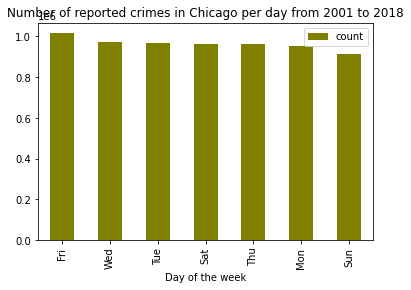

In [132]:
cp.sort_values('count', ascending = False).plot(kind='bar',color = 'olive', x='Day of the week', y='count')
plt.xlabel = "Day of the week"
plt.ylabel = "Number of reported crimes"
plt.title('Number of reported crimes in Chicago per day from 2001 to 2018')

## Working With RDD

In [7]:
!ls

police_data.csv  spark-3.3.1-bin-hadoop3
sample_data	 spark-3.3.1-bin-hadoop3.tgz


In [12]:
psrdd = sc.textFile('police_data.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [13]:
psrdd_header = psrdd.first()


In [16]:
psrdd_rest = psrdd.filter(lambda line: line != psrdd_header)
psrdd_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

**How many police stations are there?**

In [19]:
psrdd_rest.map(lambda line: line.split(',')).count()

24

**Display the District ID, District name, Address and Zip for the police station with District ID 7**


In [33]:
(psrdd_rest.filter(lambda line: line.split(',')[0]== '7').
 map(lambda line: (line.split(',')[0],
     line.split(',')[1],
     line.split(',')[2],
     line.split(',')[5]))).collect()
#  map(lambda line: line.split(','))

[('7', 'Englewood', '1438 W 63rd St', '60636')]

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**

In [36]:
(psrdd_rest.filter(lambda line:  line.split(',')[0] in ['10', '11']).
  map(lambda line: (line.split(',')[1],
       line.split(',')[2],
       line.split(',')[5]))).collect()

[('Ogden', '3315 W Ogden Ave', '60623'),
 ('Harrison', '3151 W Harrison St', '60612')]

** I documented this while practcing to liean Pyspark, Thanks! MD **